In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
# load the combined dataframe
all = pd.read_pickle("Pickles/fusionv0/all.pkl")

# Normalize spectra

In [4]:
all = all.drop(["parallax", "ra", "dec", "ra_error", "dec_error", "parallax_error", "pmra", "pmdec", "pmra_error", "pmdec_error", 
            "phot_g_mean_flux", "flagnopllx", "phot_g_mean_flux_error", "phot_bp_mean_flux", "phot_rp_mean_flux", 
            "phot_bp_mean_flux_error", "phot_rp_mean_flux_error", "obsid"], axis=1) # leave label


TypeError: no numeric data to plot

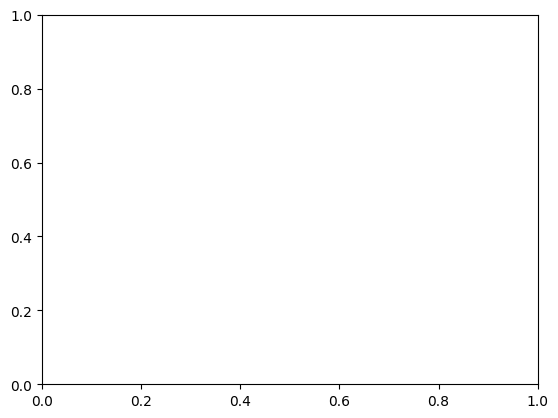

In [5]:
# plot the fluxes
plt.figure()
all.iloc[0].plot()
plt.title("Fluxes of the first star")
plt.show()

# for each row, normalize the fluxes
for index, row in all.iterrows():
    row = row / row.mean()

# plot the normalized fluxes
plt.figure()
all.iloc[0].plot()
plt.title("Normalized fluxes of the first star")
plt.show()

In [ ]:
# for each row, normalize the fluxes in batches

for index, row in all.iterrows():
    row = row / row.mean()

: 

In [1]:
import gc
gc.collect()

5

In [4]:
all.head()

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_3739,flux_3740,flux_3741,flux_3742,flux_3743,flux_3744,flux_3745,flux_3746,flux_3747,label
0,36563.41400,38465.153116,36786.449716,32344.849228,28946.939569,28373.519033,30070.086276,31588.511844,31434.477290,30506.123332,...,7167.345875,7263.572426,7303.474595,7357.885240,7404.294078,7441.365615,7420.467427,7405.088827,7396.33740,binary_star
1,-84.44414,-18.457712,-31.129835,26.802893,-28.095104,2.384415,-16.409843,11.600972,-10.525142,2.846893,...,79.866584,81.941077,81.858856,68.845152,63.948362,68.458177,83.088772,78.631683,54.30389,binary_star
2,6450.40530,6112.997099,5652.585503,5499.980203,4932.126572,5444.601171,5949.775399,4875.807548,5629.138577,4936.174387,...,2216.259456,2280.466721,2329.671777,2347.762757,2372.218792,2404.814844,2425.271277,2447.013868,2470.27880,binary_star
3,158.45631,148.617929,136.109717,162.539496,112.700032,96.255699,137.908967,69.776282,127.323661,174.118151,...,88.791816,90.494684,91.909245,91.703833,91.719632,92.037940,93.592554,95.360013,97.32745,binary_star
4,447.24963,369.092873,344.252030,271.554970,345.954359,206.957618,216.396071,268.023539,330.793648,312.452405,...,217.617691,220.196599,223.598581,229.456033,227.499663,216.851775,225.748373,230.363614,230.24533,binary_star


### Ra dec

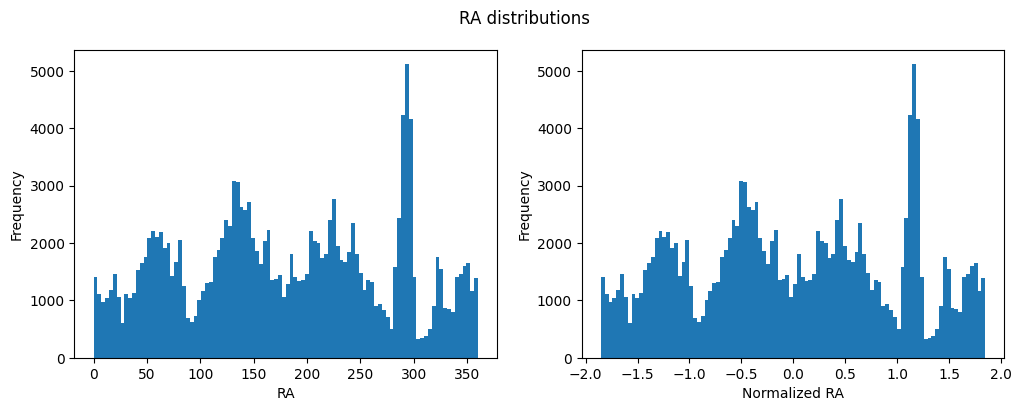

In [18]:
ra = all["ra"]

# plot both the normalized and unnormalized ra distributions subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("RA distributions")
axs[0].hist(ra, bins=100)
axs[0].set_xlabel("RA")
axs[0].set_ylabel("Frequency")
# normalize the ra column
ra = (ra - ra.mean()) / ra.std()
axs[1].hist(ra, bins=100)
axs[1].set_xlabel("Normalized RA")
axs[1].set_ylabel("Frequency")
plt.show()

# save the normalized ra column
all["ra"] = ra


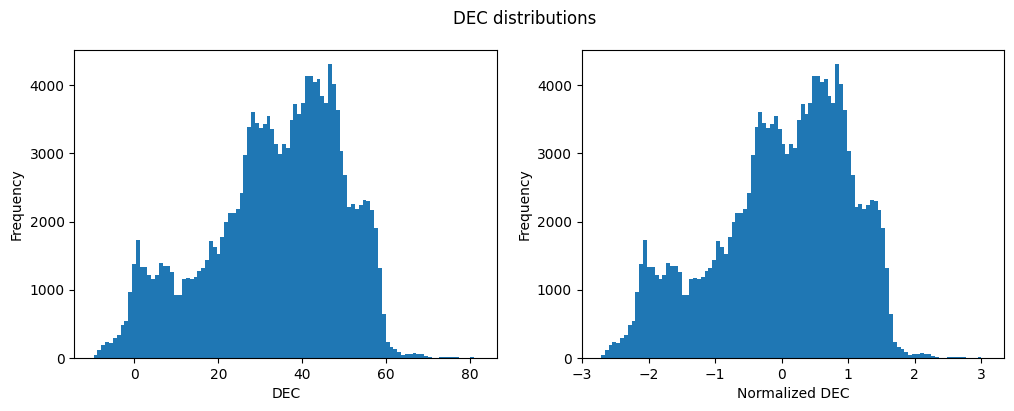

In [21]:
# Same for dec
dec = all["dec"]

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("DEC distributions")
axs[0].hist(dec, bins=100)
axs[0].set_xlabel("DEC")
axs[0].set_ylabel("Frequency")
dec = (dec - dec.mean()) / dec.std()
axs[1].hist(dec, bins=100)
axs[1].set_xlabel("Normalized DEC")
axs[1].set_ylabel("Frequency")
plt.show()

all["dec"] = dec


### Ra and dec errors 

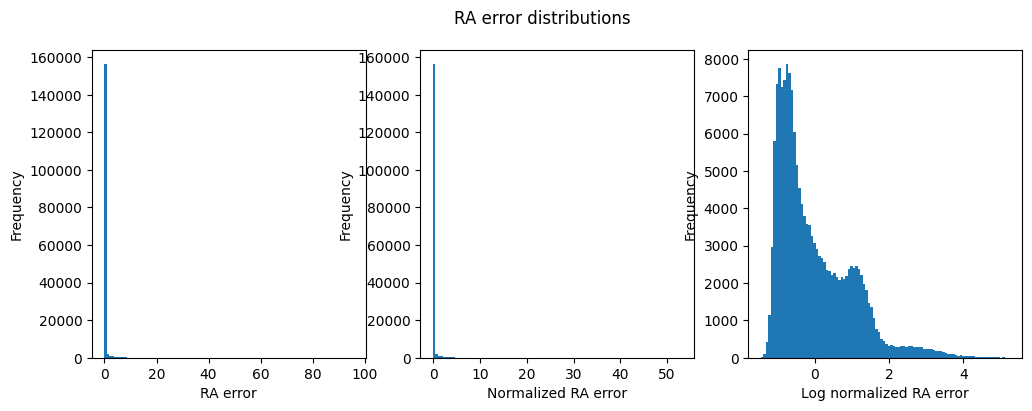

In [27]:
ra_error = all["ra_error"]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("RA error distributions")
axs[0].hist(ra_error, bins=100)
axs[0].set_xlabel("RA error")
axs[0].set_ylabel("Frequency")
# log normalize the ra error column
logg = (np.log(ra_error) - np.log(ra_error).mean()) / np.log(ra_error).std()
axs[2].hist(logg, bins=100)
axs[2].set_xlabel("Log normalized RA error")
axs[2].set_ylabel("Frequency")
ra_error = (ra_error - ra_error.mean()) / ra_error.std()
axs[1].hist(ra_error, bins=100)
axs[1].set_xlabel("Normalized RA error")
axs[1].set_ylabel("Frequency")
plt.show()

all["ra_error"] = logg


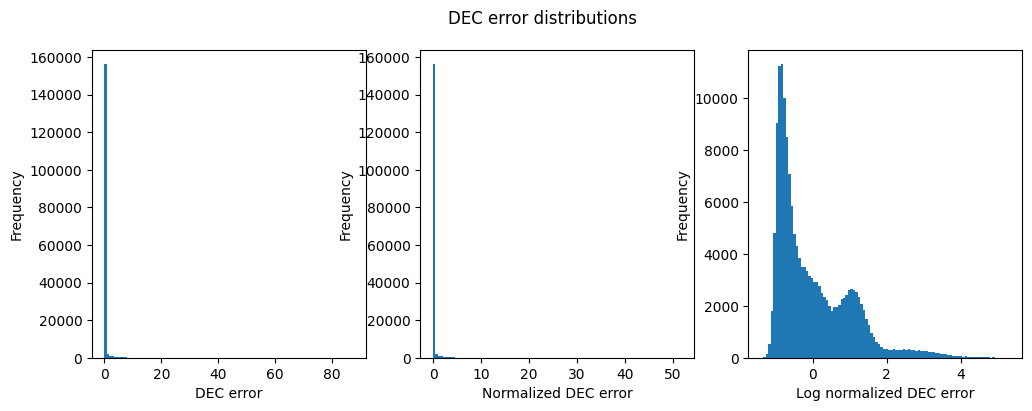

In [29]:
dec_error = all["dec_error"]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("DEC error distributions")
axs[0].hist(dec_error, bins=100)
axs[0].set_xlabel("DEC error")
axs[0].set_ylabel("Frequency")
logg = (np.log(dec_error) - np.log(dec_error).mean()) / np.log(dec_error).std()
axs[2].hist(logg, bins=100)
axs[2].set_xlabel("Log normalized DEC error")
axs[2].set_ylabel("Frequency")
dec_error = (dec_error - dec_error.mean()) / dec_error.std()
axs[1].hist(dec_error, bins=100)
axs[1].set_xlabel("Normalized DEC error")
axs[1].set_ylabel("Frequency")
plt.show()

all["dec_error"] = logg

# Parallax

/home/jcwind/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


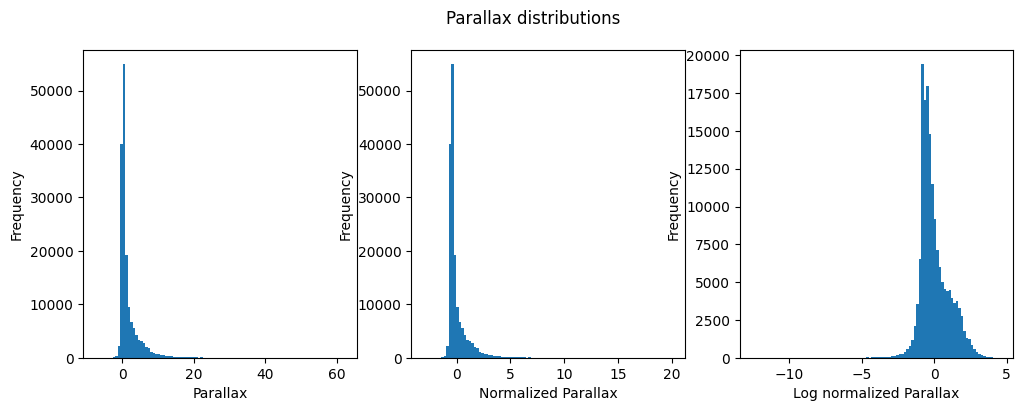

In [34]:
parallax = all["parallax"]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("Parallax distributions")
axs[0].hist(parallax, bins=100)
axs[0].set_xlabel("Parallax")
axs[0].set_ylabel("Frequency")
parallax2 = (parallax - parallax.mean()) / parallax.std()
axs[1].hist(parallax2, bins=100)
axs[1].set_xlabel("Normalized Parallax")
axs[1].set_ylabel("Frequency")
logg = (np.log1p(parallax) - np.log1p(parallax).mean()) / np.log1p(parallax).std()
axs[2].hist(logg, bins=100)
axs[2].set_xlabel("Log normalized Parallax")
axs[2].set_ylabel("Frequency")
plt.show()

all["parallax"] = logg

# Parallax error

/home/jcwind/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


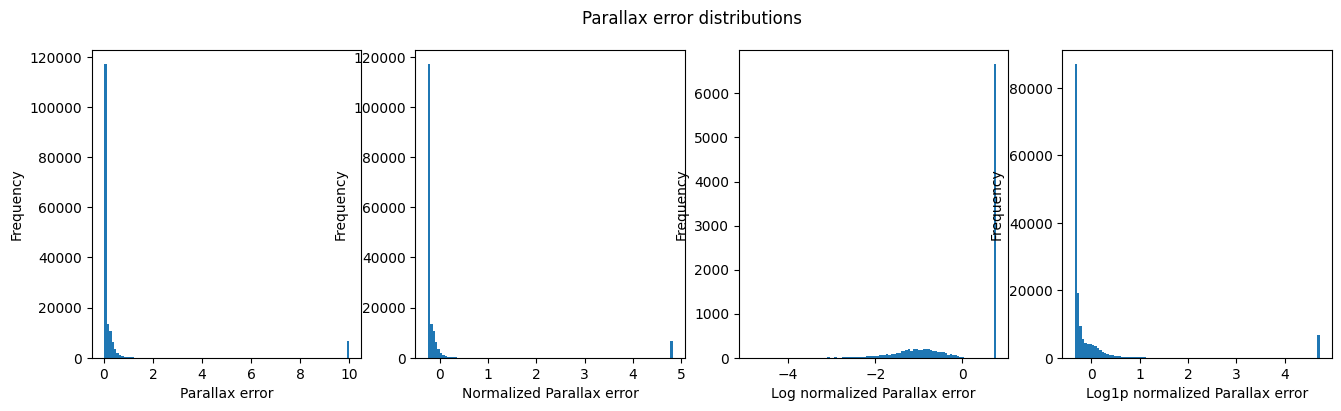

In [40]:
parallax_error = all["parallax_error"]

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle("Parallax error distributions")
axs[0].hist(parallax_error, bins=100)
axs[0].set_xlabel("Parallax error")
axs[0].set_ylabel("Frequency")
parallax_error = (parallax_error - parallax_error.mean()) / parallax_error.std()
axs[1].hist(parallax_error, bins=100)
axs[1].set_xlabel("Normalized Parallax error")
axs[1].set_ylabel("Frequency")
logg = (np.log(parallax_error) - np.log(parallax_error).mean()) / np.log(parallax_error).std()
axs[2].hist(logg, bins=100)
axs[2].set_xlabel("Log normalized Parallax error")
axs[2].set_ylabel("Frequency")
logg1p = (np.log1p(parallax_error) - np.log1p(parallax_error).mean()) / np.log1p(parallax_error).std()
axs[3].hist(logg1p, bins=100)
axs[3].set_xlabel("Log1p normalized Parallax error")
axs[3].set_ylabel("Frequency")
plt.show()

all["parallax_error"] = logg


In [52]:
def plot_alternative_normalizations(all, data_column, title, save=False):
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle(title + " distributions")
    axs[0].hist(data_column, bins=100)
    axs[0].set_xlabel(title)
    axs[0].set_ylabel("Frequency")
    normalized = (data_column - data_column.mean()) / data_column.std()
    axs[1].hist(normalized, bins=100)
    axs[1].set_xlabel("Normalized")
    axs[1].set_ylabel("Frequency")
    # check if the data is log normalizable, if not, skip the log normalizations
    logg1p = (np.log1p(data_column) - np.log1p(data_column).mean()) / np.log1p(data_column).std()
    axs[3].hist(logg1p, bins=100)
    axs[3].set_xlabel("Log1p normalized " + title)
    axs[3].set_ylabel("Frequency")
    


    if data_column.any() == 0:
        print("Data column contains 0 values, skipping log normalization")
        if save == "log1p":
            all["data_column"] = logg1p
        elif save == "normalized":
            all["data_column"] = normalized
        plt.show()
        return all
    logg = (np.log(data_column) - np.log(data_column).mean()) / np.log(data_column).std()
    
    axs[2].hist(logg, bins=100)
    axs[2].set_xlabel("Log normalized" + title)
    axs[2].set_ylabel("Frequency")
    

    plt.show()

    if save == "log":
        all["data_column"] = logg
    elif save == "log1p":
        all["data_column"] = logg1p
    elif save == "normalized":
        all["data_column"] = normalized
    return all

In [55]:
def plot_alternative_normalizations(all, data_column, title, save=False):
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle(title + " distributions")
    
    # Original data distribution
    axs[0].hist(data_column.dropna(), bins=100)
    axs[0].set_xlabel(title)
    axs[0].set_ylabel("Frequency")
    
    # Normalized data
    normalized = (data_column - data_column.mean()) / data_column.std()
    axs[1].hist(normalized.dropna(), bins=100)
    axs[1].set_xlabel("Normalized")
    axs[1].set_ylabel("Frequency")
    
    # Log1p normalization (handles zeros)
    logg1p = (np.log1p(data_column) - np.log1p(data_column).mean()) / np.log1p(data_column).std()
    axs[3].hist(logg1p.dropna(), bins=100)
    axs[3].set_xlabel("Log1p normalized " + title)
    axs[3].set_ylabel("Frequency")
    
    # Log normalization (only for positive values)
    positive_data = data_column[data_column > 0]
    if len(positive_data) > 0:
        logg = (np.log(positive_data) - np.log(positive_data).mean()) / np.log(positive_data).std()
        axs[2].hist(logg.dropna(), bins=100)
        axs[2].set_xlabel("Log normalized " + title)
        axs[2].set_ylabel("Frequency")
    else:
        print("No positive values in the data for log normalization.")
    
    plt.show()
    
    # Save the desired transformation
    if save == "log":
        all["data_column"] = logg if len(positive_data) > 0 else all["data_column"]
    elif save == "log1p":
        all["data_column"] = logg1p
    elif save == "normalized":
        all["data_column"] = normalized
        
    return all


## Pmra dec

/home/jcwind/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


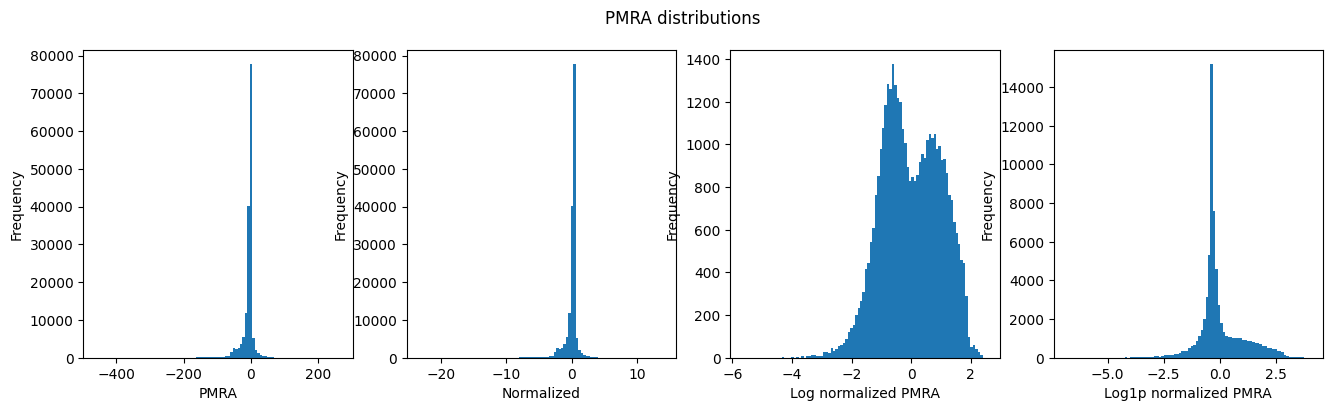

In [56]:
all = plot_alternative_normalizations(all, all["pmdec"], "PMRA")

# Using the Yeo-Johnson Transform to make data more gaussian

In [2]:
from sklearn.preprocessing import PowerTransformer

# load the combined dataframe
all = pd.read_pickle("Pickles/fusionv0/all.pkl")


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Load the combined dataframe
all = pd.read_pickle("Pickles/fusionv0/all.pkl")

# Select relevant columns
allgaia = all[["parallax", "ra", "dec", "ra_error", "dec_error", "parallax_error", "pmra", "pmdec", "pmra_error", "pmdec_error", 
               "phot_g_mean_flux", "flagnopllx", "phot_g_mean_flux_error", "phot_bp_mean_flux", "phot_rp_mean_flux", 
               "phot_bp_mean_flux_error", "phot_rp_mean_flux_error"]].copy()

# Initialize the PowerTransformer
pt = PowerTransformer()

# Fit the PowerTransformer for each column and store the lambda values
lambdas = {}
for column in allgaia.columns:
    pt.fit(allgaia[[column]])
    lambdas[column] = pt.lambdas_

# Display the lambda values for each column
for column, lambda_value in lambdas.items():
    print(f"Lambda value for {column}: {lambda_value}")


Lambda value for parallax: [-0.00262575]
Lambda value for ra: [0.75163717]
Lambda value for dec: [1.08303371]
Lambda value for ra_error: [-6.317907]
Lambda value for dec_error: [-6.6962514]
Lambda value for parallax_error: [-4.188312]
Lambda value for pmra: [0.98907673]
Lambda value for pmdec: [1.09044889]
Lambda value for pmra_error: [-4.239686]
Lambda value for pmdec_error: [-4.3643737]
Lambda value for phot_g_mean_flux: [0.05515172]
Lambda value for flagnopllx: [-35.19686212]
Lambda value for phot_g_mean_flux_error: [-0.11807998]
Lambda value for phot_bp_mean_flux: [0.01983101]
Lambda value for phot_rp_mean_flux: [0.05151679]
Lambda value for phot_bp_mean_flux_error: [-0.2291537]
Lambda value for phot_rp_mean_flux_error: [-0.2338957]


   parallax          ra       dec  ra_error  dec_error  parallax_error  \
0  1.954333  324.570577 -2.378171  0.016225   0.016745        0.018079   
1  6.959870  331.262805 -2.530651  0.070703   0.067052        0.079696   
2  2.379435  290.907631 -4.494397  0.017118   0.019111        0.024489   
3  0.287166  245.009732 -2.237863  0.033039   0.024361        0.039560   
4  0.391576  236.492933 -1.664778  0.028122   0.020411        0.034200   

        pmra      pmdec  pmra_error  pmdec_error  phot_g_mean_flux  \
0   9.053763   0.701843    0.021535     0.019570      1.238463e+06   
1  37.747680 -48.060286    0.094460     0.078838      2.898485e+03   
2   4.773883   0.057278    0.020376     0.017848      1.460552e+06   
3  -6.132932  -3.513904    0.049155     0.034141      1.306923e+04   
4  -5.637486  -2.686811    0.032797     0.026114      1.619692e+04   

   flagnopllx  phot_g_mean_flux_error  phot_bp_mean_flux  phot_rp_mean_flux  \
0           0              194.779892      709186.48909

C:\Users\jcwin\AppData\Local\Temp\ipykernel_25396\1177584702.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.20673955 -0.20673955 -0.20673955 ... -0.20673955 -0.20673955
  4.83700383]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  allgaia.loc[:, column] = pt.fit_transform(allgaia[[column]])


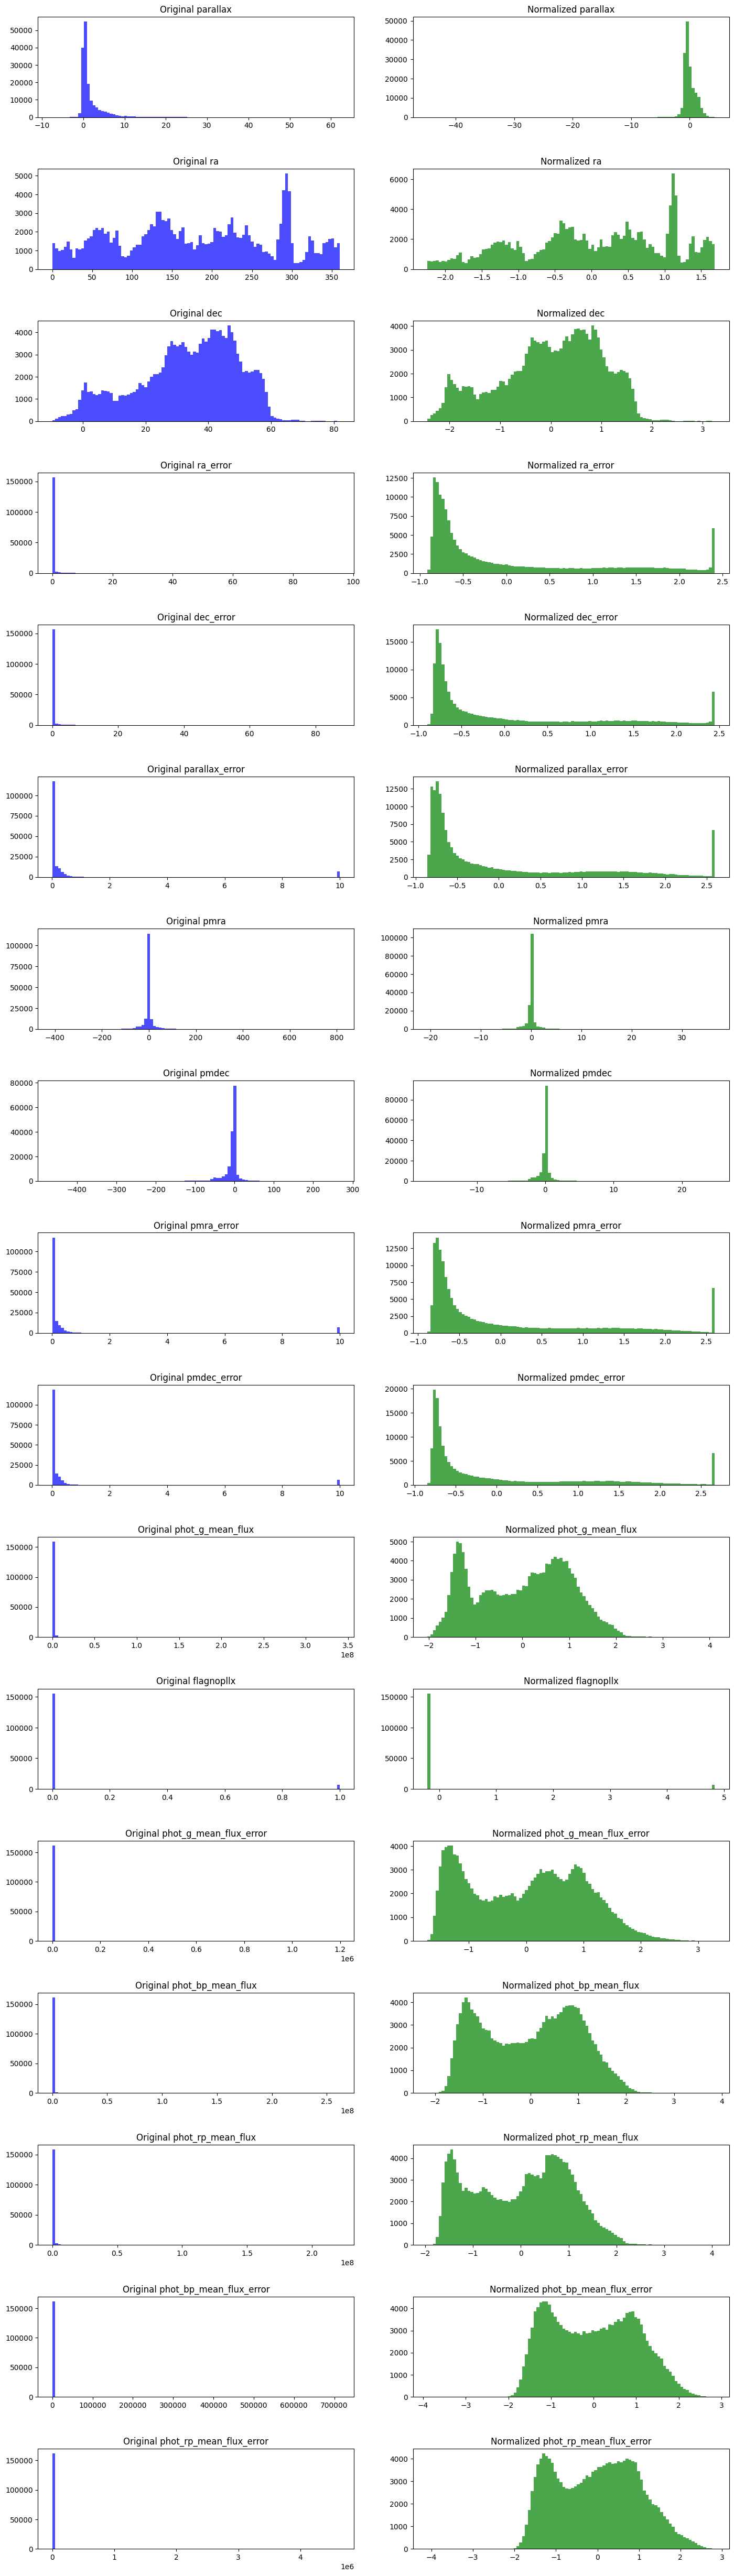

In [4]:
# Select relevant columns
allgaia = all[["parallax", "ra", "dec", "ra_error", "dec_error", "parallax_error", "pmra", "pmdec", "pmra_error", "pmdec_error", 
               "phot_g_mean_flux", "flagnopllx", "phot_g_mean_flux_error", "phot_bp_mean_flux", "phot_rp_mean_flux", 
               "phot_bp_mean_flux_error", "phot_rp_mean_flux_error"]].copy()
print(allgaia.head())

# Initialize the PowerTransformer
pt = PowerTransformer()

# Fit and transform the PowerTransformer for each column
for column in allgaia.columns:
    allgaia.loc[:, column] = pt.fit_transform(allgaia[[column]])

# Save the original data for comparison
allgaiapre = all[["parallax", "ra", "dec", "ra_error", "dec_error", "parallax_error", "pmra", "pmdec", "pmra_error", "pmdec_error", 
                  "phot_g_mean_flux", "flagnopllx", "phot_g_mean_flux_error", "phot_bp_mean_flux", "phot_rp_mean_flux", 
                  "phot_bp_mean_flux_error", "phot_rp_mean_flux_error"]].copy()

# Plot each column before and after normalization
fig, axes = plt.subplots(nrows=len(allgaia.columns), ncols=2, figsize=(15, 50))
fig.tight_layout(pad=5.0)

for i, column in enumerate(allgaia.columns):
    # Plot original data
    axes[i, 0].hist(allgaiapre[column], bins=100, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'Original {column}')
    
    # Plot normalized data
    axes[i, 1].hist(allgaia[column], bins=100, color='green', alpha=0.7)
    axes[i, 1].set_title(f'Normalized {column}')
plt.show()

# Save the normalized data into the original dataframe
all[["parallax", "ra", "dec", "ra_error", "dec_error", "parallax_error", "pmra", "pmdec", "pmra_error", "pmdec_error", 
     "phot_g_mean_flux", "flagnopllx", "phot_g_mean_flux_error", "phot_bp_mean_flux", "phot_rp_mean_flux", 
     "phot_bp_mean_flux_error", "phot_rp_mean_flux_error"]] = allgaia

# Using the Yeo-Johnson Transform to normalize spectra

In [5]:
allspectra = all.drop(["parallax", "ra", "dec", "ra_error", "dec_error", "parallax_error", "pmra", "pmdec", "pmra_error", "pmdec_error", 
            "phot_g_mean_flux", "flagnopllx", "phot_g_mean_flux_error", "phot_bp_mean_flux", "phot_rp_mean_flux", 
            "phot_bp_mean_flux_error", "phot_rp_mean_flux_error", "obsid", "label"], axis=1) 

In [6]:
# Initialize the PowerTransformer
pt = PowerTransformer()

# Fit and transform the PowerTransformer for each row (spectrum) with tqdm
for index, row in tqdm(allspectra.iterrows(), total=allspectra.shape[0]):
    allspectra.loc[index] = pt.fit_transform(row.values.reshape(-1, 1)).flatten()
    pt = PowerTransformer()

100%|██████████| 162457/162457 [11:36<00:00, 233.13it/s]


In [7]:
# add the gaia columns to the normalized spectra to form the final dataframe
all = pd.concat([allgaia, allspectra, all["label"], all['obsid']], axis=1)

# Save the final dataframe
all.to_pickle("Pickles/fusionv0/all_normalized.pkl")



In [8]:
all.head()

,parallax,ra,dec,ra_error,dec_error,parallax_error,pmra,pmdec,pmra_error,pmdec_error,...,flux_3739,flux_3740,flux_3741,flux_3742,flux_3743,flux_3744,flux_3745,flux_3746,flux_3747,label
0,0.543553,1.389134,-2.137054,-0.684581,-0.645823,-0.707510,0.507509,0.338427,-0.660683,-0.659317,...,-1.747885,-1.723046,-1.712841,-1.699011,-1.687294,-1.677986,-1.683228,-1.687094,-1.689298,binary_star
1,1.760923,1.445893,-2.143675,0.185016,0.208805,0.013223,1.830578,-1.922353,0.166486,0.068352,...,1.675467,1.781213,1.777013,1.122003,0.880917,1.102839,1.839919,1.612747,0.415701,binary_star
2,0.708860,1.099056,-2.227139,-0.667455,-0.598062,-0.621795,0.307838,0.298504,-0.676420,-0.683972,...,-1.861332,-1.812680,-1.776280,-1.763084,-1.745399,-1.722098,-1.707631,-1.692382,-1.676209,binary_star
3,-0.479359,0.689671,-2.130939,-0.379835,-0.495051,-0.430871,-0.213932,0.100527,-0.311698,-0.459376,...,-1.817145,-1.772840,-1.736470,-1.741727,-1.741322,-1.733180,-1.693688,-1.649335,-1.600624,binary_star
4,-0.383239,0.611695,-2.105723,-0.465204,-0.572175,-0.497120,-0.189789,0.144364,-0.512460,-0.567640,...,-1.690342,-1.654762,-1.607906,-1.527445,-1.554289,-1.700920,-1.578344,-1.515001,-1.516623,binary_star


In [9]:
# Plot the first few spectrums before and after normalization
plt.figure(figsize=(15, 5))
plt.plot(all.drop(["parallax", "ra", "dec", "ra_error", "dec_error", "parallax_error", "pmra", "pmdec", "pmra_error", "pmdec_error", 
                   "phot_g_mean_flux", "flagnopllx", "phot_g_mean_flux_error", "phot_bp_mean_flux", "phot_rp_mean_flux", 
                   "phot_bp_mean_flux_error", "phot_rp_mean_flux_error", "obsid", "label"], axis=1).iloc[0], color='blue', label='Original')

plt.title('First spectrum before normalization')
plt.legend()
# change x axis labels to integers
plt.xticks(np.arange(0, 3840, 200))

plt.show()
plt.figure(figsize=(15, 5))

plt.plot(allspectra.iloc[0], color='green', label='Normalized')
plt.title('First spectrum after normalization')
plt.xticks(np.arange(0, 3840, 200))
plt.legend()
plt.show()




KeyError: "['obsid'] not found in axis"

<Figure size 1500x500 with 0 Axes>

In [28]:
all.head()

,obsid,ra,dec,ra_error,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,...,flux_3739,flux_3740,flux_3741,flux_3742,flux_3743,flux_3744,flux_3745,flux_3746,flux_3747,label
0,468609063,1.389134,-2.137054,-0.684581,-0.645823,0.543553,-0.707510,0.507509,-0.660683,0.338427,...,7167.345875,7263.572426,7303.474595,7357.885240,7404.294078,7441.365615,7420.467427,7405.088827,7396.33740,binary_star
1,372204081,1.445893,-2.143675,0.185016,0.208805,1.760923,0.013223,1.830578,0.166486,-1.922353,...,79.866584,81.941077,81.858856,68.845152,63.948362,68.458177,83.088772,78.631683,54.30389,binary_star
2,582101233,1.099056,-2.227139,-0.667455,-0.598062,0.708860,-0.621795,0.307838,-0.676420,0.298504,...,2216.259456,2280.466721,2329.671777,2347.762757,2372.218792,2404.814844,2425.271277,2447.013868,2470.27880,binary_star
3,552506177,0.689671,-2.130939,-0.379835,-0.495051,-0.479359,-0.430871,-0.213932,-0.311698,0.100527,...,88.791816,90.494684,91.909245,91.703833,91.719632,92.037940,93.592554,95.360013,97.32745,binary_star
4,133703002,0.611695,-2.105723,-0.465204,-0.572175,-0.383239,-0.497120,-0.189789,-0.512460,0.144364,...,217.617691,220.196599,223.598581,229.456033,227.499663,216.851775,225.748373,230.363614,230.24533,binary_star


# Separating the test set

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataframe into training and test sets
train_df, test_df = train_test_split(all, test_size=0.2, random_state=42)

# Save the dataframes
train_df.to_pickle("Pickles/fusionv0/train.pkl")
test_df.to_pickle("Pickles/fusionv0/test.pkl")